In [4]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\misha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\misha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [42]:
df_games = pd.read_csv(r'C:\Users\misha\Pet-project\Parsing\games_dataset_gpt_12_02.csv',lineterminator = '\n')
df_movies = pd.read_csv(r'C:\Users\misha\Pet-project\Parsing\movies_dataset.csv',lineterminator = '\n', )
df_movies.at[54,'GPT_answer'] = np.nan
df_movies['GPT_answer'][0]

'/start/Atmosphere:\nTokyo Story is a Japanese drama film directed by Yasujiro Ozu, which was released in 1953. The film follows an aging couple who travel to Tokyo to visit their grown children, only to find that their children are too busy with their own lives to pay much attention to them. The atmosphere of the film is melancholic, introspective and nostalgic. It explores themes of aging, family, and the changing relationships between generations in post-war Japan. The film is known for its delicate and understated style, and its keen insight into the human experience.\n/end/Atmosphere\n/start/Tags:\nJapanese drama, aging, family, relationships, post-war Japan, melancholic, introspective, nostalgic.\n/end/Tags\n/start/RecommensationsGame:\nNone.\n/end/RecommensationsGame\n/start/RecommensationsBook:\n"The Housekeeper and the Professor" by Yoko Ogawa, "Norwegian Wood" by Haruki Murakami, "Kitchen" by Banana Yoshimoto.\n/end/RecommensationsBook'

In [48]:
def regEx_splitting(row,var):
    regEx = re.search(fr'(?<=\/start\/{var}:\n)(.*)(?=\n\/end\/{var})', row['GPT_answer'])
    row[var] = regEx.group() if regEx is not None else None
    return row

def df_GPT_answer_reshape(df, movie = False):
    first_nan_row = pd.isnull(df['GPT_answer']).argmax()
    if movie:
        for i in ['Atmosphere', 'Tags','RecommensationsGame','RecommensationsBook']:
            df = df[:first_nan_row].apply(regEx_splitting, axis='columns',args = [i])
    else:
        for i in ['Atmosphere', 'Tags','RecommensationsMovie','RecommensationsBook']:
            df = df[:first_nan_row].apply(regEx_splitting, axis='columns',args = [i])
    return df
df_games_reshaped = df_GPT_answer_reshape(df_games)
df_movie_reshaped = df_GPT_answer_reshape(df_movies, movie = True)
df_movie_reshaped = df_movie_reshaped.rename(columns = {'summary\r':'summary',})
df_movie_reshaped=df_movie_reshaped.drop(['GPT_answer'], axis=1)
df_movie_reshaped.to_excel('df_movie_reshaped.xlsx', index=False)

In [45]:
df_movie_reshaped

,title,score,date,summary,Atmosphere,Tags,RecommensationsGame,RecommensationsBook
0,Tokyo Story,100,"March 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,Tokyo Story is a Japanese drama film directed ...,"Japanese drama, aging, family, relationships, ...",None.,"""The Housekeeper and the Professor"" by Yoko Og..."
1,The Godfather,100,"March 24, 1972",Francis Ford Coppola's epic features Marlon Br...,The Godfather is a classic crime drama film di...,"Crime drama, Italian-American mafia, organized...","""Grand Theft Auto: Vice City"", ""Mafia: The Cit...","""The Mafia Manager"" by V. Valcarega, ""The Wage..."
2,Citizen Kane,100,"September 4, 1941","Following the death of a publishing tycoon, ne...",Citizen Kane is a classic American drama film ...,"American drama, newspaper magnate, power, weal...",None.,"""The Power Broker: Robert Moses and the Fall o..."
3,Rear Window,100,"September 1, 1954",A wheelchair-bound photographer spies on his n...,Rear Window is a classic American suspense fil...,"Suspense, voyeurism, tension, privacy, American.","""Hitman: Absolution"", ""Eagle Eye Mysteries: vi...","""The Talented Mr. Ripley"" by Patricia Highsmit..."
4,Casablanca,100,"January 23, 1943","A Casablanca, Morocco casino owner in 1941 she...",Casablanca is a classic American war film dire...,"Romantic, bittersweet, nostalgic, war, love, s...",None.,"""Atonement"" by Ian McEwan, ""Love in the Time o..."
5,Boyhood,100,"July 11, 2014","Filmed over 12 years with the same cast, Richa...",Boyhood is a coming-of-age drama film directed...,"Nostalgic, contemplative, emotionally honest, ...",None.,"""The Catcher in the Rye"" by J.D. Salinger, ""To..."
6,Three Colors: Red,100,"November 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,Three Colors: Red is a French film directed by...,"Introspective, melancholic, thought-provoking,...",None.,"""The Stranger"" by Albert Camus, ""One Hundred Y..."
7,Vertigo,100,"May 28, 1958",Vertigo creates a dizzying web of mistaken ide...,Vertigo is a psychological thriller film direc...,"Eerie, suspenseful, haunting, psychological, o...",None.,"""Psycho"" by Robert Bloch, ""The Silence of the ..."
8,Notorious,100,"September 6, 1946",A woman is asked to spy on a group of Nazi fri...,Notorious is a classic Hollywood film noir dir...,"Tense, suspenseful, atmospheric, espionage, de...",None.,"""The Spy Who Came In from the Cold"" by John le..."
9,Singin' in the Rain,99,"April 11, 1952",A silent film production company and cast make...,Singin' in the Rain is a classic Hollywood mus...,"Light-hearted, fun, joyful, musical, Hollywood...",None.,"""On the Town: A Community Adventure"" by Betty ..."


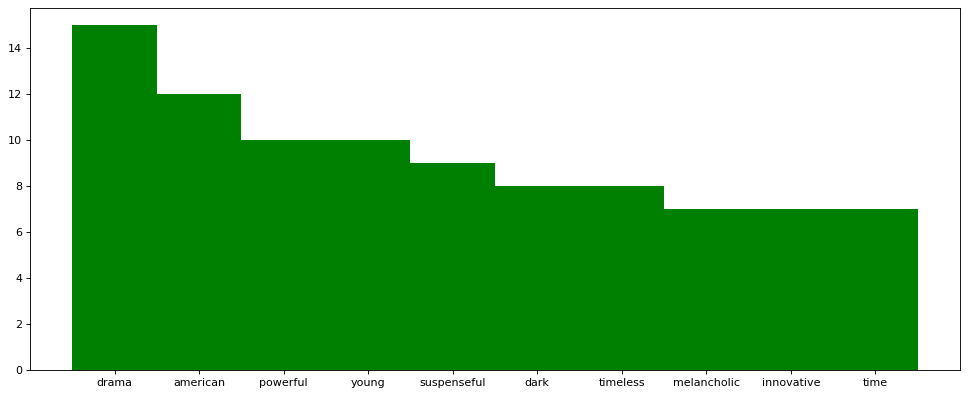

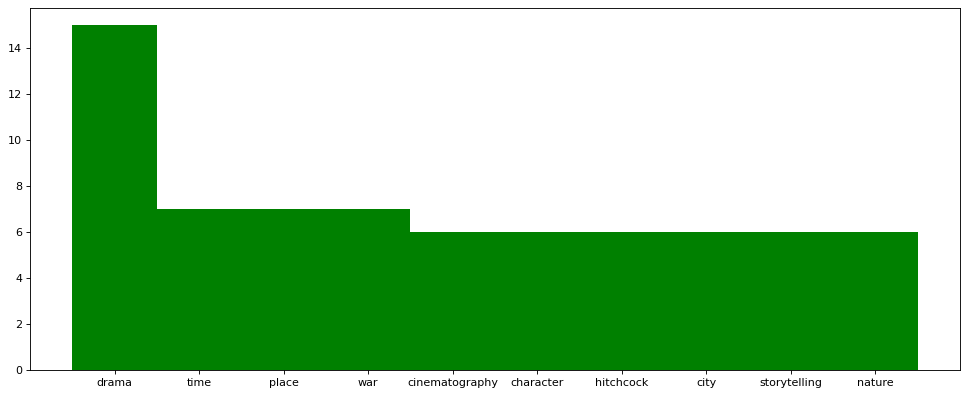

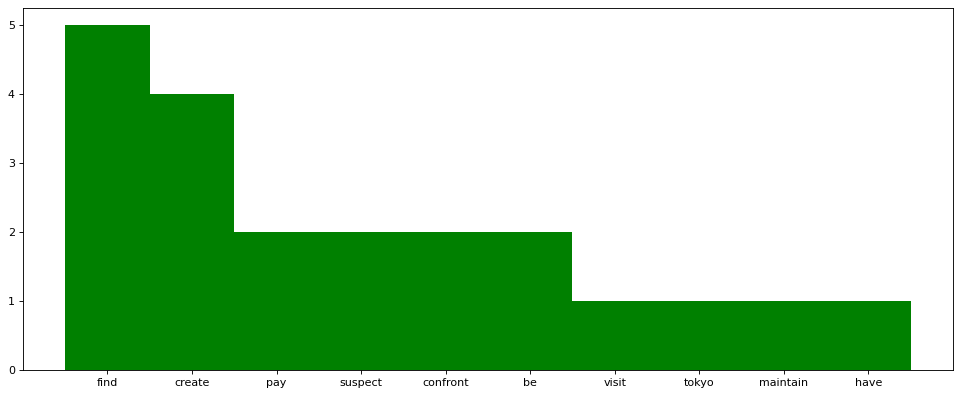

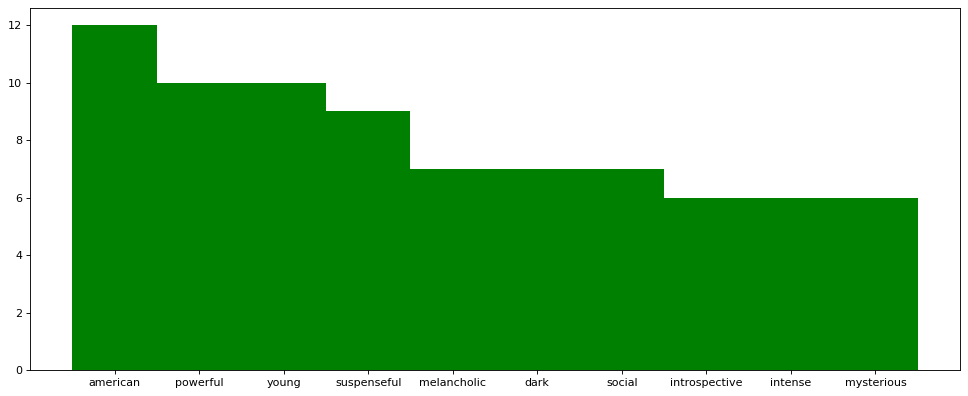

['drama', 'american', 'powerful', 'young', 'suspenseful', 'dark', 'timeless', 'melancholic', 'innovative', 'time']


In [69]:
def get_word_counts(df, pos_tags):
    word_counts = Counter()
    for text in df['Atmosphere']:
        tokens = nltk.word_tokenize(text.lower())
        words = set([t for t, pos in nltk.pos_tag(tokens) if pos in pos_tags])
        word_counts.update(words)
    return word_counts.most_common(10)

def plot_histogram(word_counts):
    plt.figure(figsize=(15, 6), dpi=80)
    plt.bar([word for word, count in word_counts], [count for word, count in word_counts], width=1.0, color='g')
    plt.show()

def analyze_text(df):
    pos_tags = {'summon': ['NN','VB','JJ'], 'NN': ['NN'], 'VB': ['VB'], 'JJ': ['JJ']}
    word_counts = {}
    for pos, tags in pos_tags.items():
        word_counts[pos] = get_word_counts(df, tags)
        plot_histogram(word_counts[pos])
    return [word for word, count in word_counts['summon']]

word_list = analyze_text(df_movie_reshaped)
print(word_list)

In [68]:
def cleaning_movies(row):
    lst = ['film', 'atmosphere', 'story', 'classic',  'american', 'human', 'tense', 'world', 'life','s', 'use']
    for i in ([row['title']] + lst):
        row['Atmosphere'] =  re.sub(fr"\b{i}\b", "", row['Atmosphere'])
    return row
df_movie_reshaped = df_movie_reshaped.apply(cleaning_movies, axis='columns')

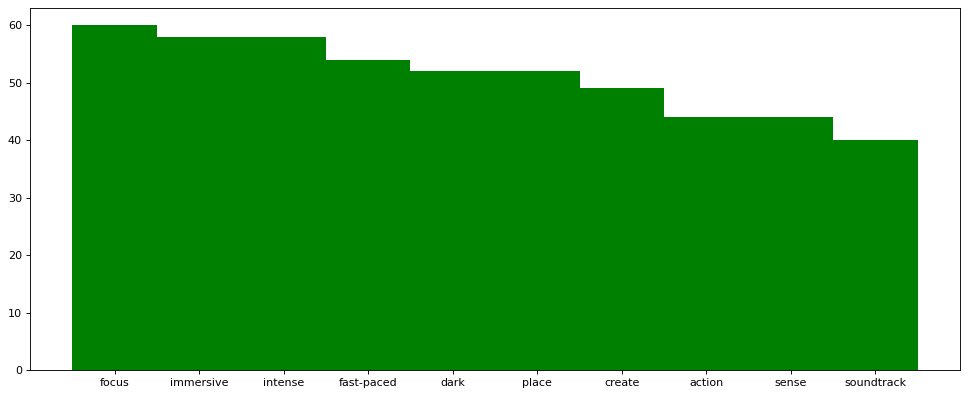

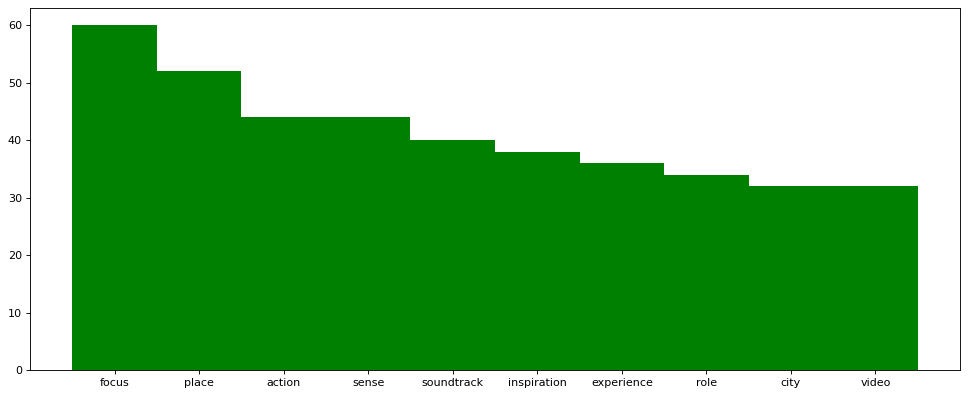

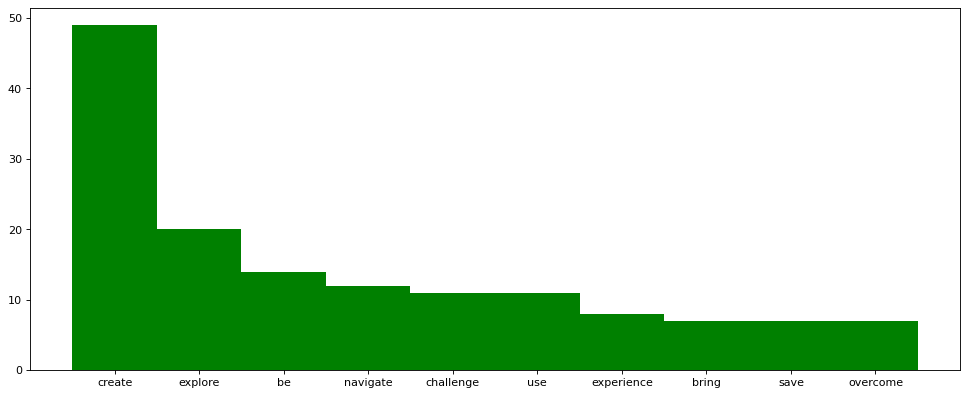

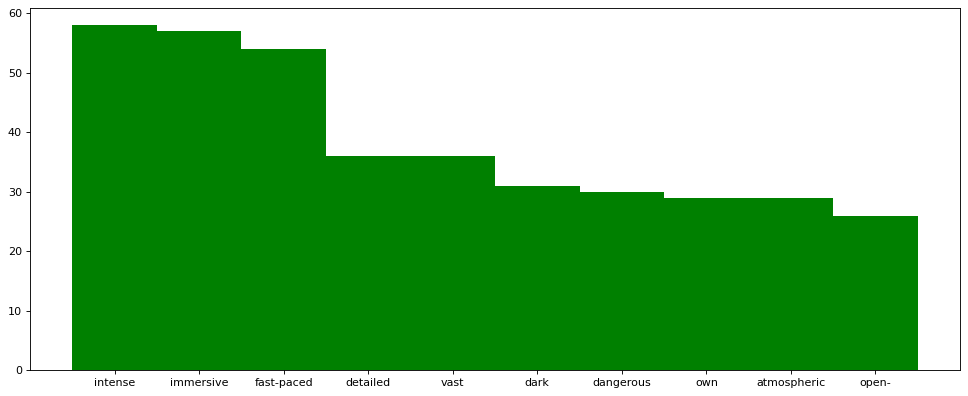

['focus', 'immersive', 'intense', 'fast-paced', 'dark', 'place', 'create', 'action', 'sense', 'soundtrack']


In [72]:
word_list = analyze_text(df_games_reshaped)
print(word_list)

In [71]:
def cleanin_games(row):
    lst = ['game', 'atmosphere', 'world', 'player']
    for i in ([row['title']] + lst):
        row['Atmosphere'] =  re.sub(fr"\b{i}\b", "", row['Atmosphere'])
    return row
df_games_reshaped = df_games_reshaped.apply(cleanin_games, axis='columns')

In [85]:
def jaccard_similarity(doc1, doc2):
    # Helper function to calculate Jaccard similarity between two documents
    text = nltk.word_tokenize(doc1.lower())
    words_doc_NN_VB_1 = set([i[0] for i in nltk.pos_tag(text) if i[1] in ['NN','VB']])
    words_doc_JJ_1 = set([i[0] for i in nltk.pos_tag(text) if i[1] in ['JJ']])
    text = nltk.word_tokenize(doc2.lower())
    words_doc_NN_VB_2 = set([i[0] for i in nltk.pos_tag(text) if i[1] in ['NN','VB']])
    words_doc_JJ_2 = set([i[0] for i in nltk.pos_tag(text) if i[1] in ['JJ']])
    intersection_NN_VB = words_doc_NN_VB_1.intersection(words_doc_NN_VB_2)
    intersection_JJ = words_doc_JJ_1.intersection(words_doc_JJ_2)
    union_NN_VB = words_doc_NN_VB_1.union(words_doc_NN_VB_2)
    union_JJ = words_doc_JJ_1.union(words_doc_JJ_2)
    return (len(intersection_NN_VB) / len(union_NN_VB)) + (len(intersection_JJ) / len(union_JJ) * 1)

js = lambda doc: jaccard_similarity(doc, df_games_reshaped['Atmosphere'][0]) + \
                 jaccard_similarity(doc, df_games_reshaped['Tags'][0]) + \
                 jaccard_similarity(doc, df_games_reshaped['summary'][0])
lst = [[i, js(i)] for i in df_movie_reshaped['Atmosphere']]
max(lst, key=lambda x: x[1])

['"" is a fantastical journey into a magical and mysterious  filled with spirits, creatures, and beings that are both fascinating and sometimes frightening. The \'  is a mix of wonder and fear, as the young protagonist Chihiro travels through this strange realm, encountering strange and dangerous creatures at every turn. The animation style and breathtaking visuals create an immersive and captivating  that keeps the audience entranced from beginning to end.',
 0.319047619047619]

In [78]:
df_movie_reshaped

,title,score,date,summary\r,GPT_answer,Atmosphere,Tags,RecommensationsGame,RecommensationsBook
0,Tokyo Story,100,"March 13, 1972",Yasujiro Ozu’s Tokyo Story follows an aging co...,/start/Atmosphere:\nTokyo Story is a Japanese ...,is a Japanese drama directed by Yasujiro Ozu...,"Japanese drama, aging, family, relationships, ...",None.,"""The Housekeeper and the Professor"" by Yoko Og..."
1,The Godfather,100,"March 24, 1972",Francis Ford Coppola's epic features Marlon Br...,/start/Atmosphere:\nThe Godfather is a classic...,is a crime drama directed by Francis Ford C...,"Crime drama, Italian-American mafia, organized...","""Grand Theft Auto: Vice City"", ""Mafia: The Cit...","""The Mafia Manager"" by V. Valcarega, ""The Wage..."
2,Citizen Kane,100,"September 4, 1941","Following the death of a publishing tycoon, ne...",/start/Atmosphere:\nCitizen Kane is a classic ...,is a American drama directed by and starrin...,"American drama, newspaper magnate, power, weal...",None.,"""The Power Broker: Robert Moses and the Fall o..."
3,Rear Window,100,"September 1, 1954",A wheelchair-bound photographer spies on his n...,/start/Atmosphere:\nRear Window is a classic A...,is a American suspense directed by Alfred H...,"Suspense, voyeurism, tension, privacy, American.","""Hitman: Absolution"", ""Eagle Eye Mysteries: vi...","""The Talented Mr. Ripley"" by Patricia Highsmit..."
4,Casablanca,100,"January 23, 1943","A Casablanca, Morocco casino owner in 1941 she...",/start/Atmosphere:\nCasablanca is a classic Am...,is a American war directed by Michael Curti...,"Romantic, bittersweet, nostalgic, war, love, s...",None.,"""Atonement"" by Ian McEwan, ""Love in the Time o..."
5,Boyhood,100,"July 11, 2014","Filmed over 12 years with the same cast, Richa...",/start/Atmosphere:\nBoyhood is a coming-of-age...,is a coming-of-age drama directed by Richard...,"Nostalgic, contemplative, emotionally honest, ...",None.,"""The Catcher in the Rye"" by J.D. Salinger, ""To..."
6,Three Colors: Red,100,"November 23, 1994",Krzysztof Kieslowski closes his Three Colors t...,/start/Atmosphere:\nThree Colors: Red is a Fre...,is a French directed by Krzysztof Kieślowski...,"Introspective, melancholic, thought-provoking,...",None.,"""The Stranger"" by Albert Camus, ""One Hundred Y..."
7,Vertigo,100,"May 28, 1958",Vertigo creates a dizzying web of mistaken ide...,/start/Atmosphere:\nVertigo is a psychological...,is a psychological thriller directed by Alfr...,"Eerie, suspenseful, haunting, psychological, o...",None.,"""Psycho"" by Robert Bloch, ""The Silence of the ..."
8,Notorious,100,"September 6, 1946",A woman is asked to spy on a group of Nazi fri...,/start/Atmosphere:\nNotorious is a classic Hol...,is a Hollywood noir directed by Alfred Hitc...,"Tense, suspenseful, atmospheric, espionage, de...",None.,"""The Spy Who Came In from the Cold"" by John le..."
9,Singin' in the Rain,99,"April 11, 1952",A silent film production company and cast make...,/start/Atmosphere:\nSingin' in the Rain is a c...,is a Hollywood musical directed by Stanley ...,"Light-hearted, fun, joyful, musical, Hollywood...",None.,"""On the Town: A Community Adventure"" by Betty ..."
